# **Mengumpulkan dataset film dengan web-scrapping**


## **1. Kode untuk Google Colab**


Install Selenium

In [ ]:
# install chromium, chromedriver, dan selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium

# import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# ganti opsi untuk menjalankan selenium secara headless
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [ ]:
! pip install tqdm
from tqdm.notebook import tqdm

Web-scrape

In [ ]:
# akses website IMDb 
driver = webdriver.Chrome(options=options)
driver.get("https://www.imdb.com/search/title/?title_type=feature&num_votes=10000,&sort=user_rating,desc&ref_=adv_prv")

list_of_movies = []
page = 1

# jumlah data = 9370
# jumlah data per halaman = 50
# jumlah halaman = 9370 / 50 = 187
page_num = list(range(187))
for i in tqdm(page_num):
  # mendapatkan list film
  movies = driver.find_elements(By.CLASS_NAME, "lister-item")

  for movie in movies:
    data_movies = []
    content = movie.find_element(By.CLASS_NAME, "lister-item-content")

    # mendapatkan judul dan tahun
    header = content.find_element(By.CLASS_NAME, "lister-item-header")
    title = header.find_element(By.TAG_NAME, "a").text
    date = header.find_element(By.CLASS_NAME, "lister-item-year").text.split()
    year = date[-1].strip("()")
    data_movies.append(title)
    data_movies.append(year)

    # mendapatkan data film
    data = content.find_elements(By.TAG_NAME, "p")
    
    # mendapatkan durasi, genre
    #age = data[0].find_element(By.CLASS_NAME, "certificate").text
    runtime = data[0].find_element(By.CLASS_NAME, "runtime").text.split()
    genre_list = data[0].find_element(By.CLASS_NAME, "genre").text.split(", ")
    genre = []
    for _ in genre_list:
      genre.append(_)
    data_movies.append(runtime[0])
    data_movies.append(genre)

    # mendapatkan rating
    rating = content.find_element(By.NAME, "ir").get_attribute("data-value")
    data_movies.append(rating)

    # mendapatkan director dan pemain film
    data2 = data[2].find_elements(By.TAG_NAME, "a")
    director = data2[0].text
    stars = []
    for i in range(1, len(data2)):
      stars.append(data2[i].text)
    data_movies.append(director)
    data_movies.append(stars)

    # mendapatkan jumlah orang yang melakukan vote
    vote = data[3].find_element(By.NAME, "nv").get_attribute("data-value")
    data_movies.append(vote)
    
    list_of_movies.append(data_movies)

  # navigasi web-scrape ke halaman selanjutnya
  if len(driver.find_elements(By.CSS_SELECTOR, "a.next-page")) > 0:
    page += 50
    url = "https://www.imdb.com/search/title/?title_type=feature&num_votes=10000,&sort=user_rating,desc&start={}&ref_=adv_nxt".format(page)
    driver.get(url)
  else:
    break

  0%|          | 0/188 [00:00<?, ?it/s]

# **Membuat dataset dalam bentuk Pandas DataFrame**

In [ ]:
import pandas as pd

In [ ]:
# convert list menjadi dataframe
df = pd.DataFrame(list_of_movies, columns=["Title", "Year", "Runtime", "Genre", "Rating", "Director", "Stars", "Vote"])

In [46]:
# convert type data agar sesuai
df["Year"] = df["Year"].astype(int)
df["Runtime"] = df["Runtime"].astype(int)
df["Rating"] = df["Rating"].astype(float)
df["Vote"] = df["Vote"].astype(int)
df

,Unnamed: 0,Title,Year,Runtime,Genre,Rating,Director,Stars,Vote
0,0,Jai Bhim,2021,164,"['Crime', 'Drama']",9.5,T.J. Gnanavel,"['Suriya', 'Lijo Mol Jose', 'Manikandan', 'Raj...",130953
1,1,The Chaos Class,1975,87,"['Comedy', 'Drama']",9.3,Ertem Egilmez,"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",39272
2,2,The Shawshank Redemption,1994,142,['Drama'],9.3,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2492791
3,3,The Godfather,1972,175,"['Crime', 'Drama']",9.2,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",1719600
4,4,Mirror Game,2016,147,"['Crime', 'Mystery', 'Thriller']",9.1,Amitabh Reza Chowdhury,"['Chanchal Chowdhury', 'Masuma Rahman Nabila',...",25248
...,...,...,...,...,...,...,...,...,...
9364,9364,The Cost of Deception,2021,125,"['Crime', 'Drama', 'History']",1.4,Keith English,"['Vivianne Bánovits', 'András Mózes', 'Barna B...",36525
9365,9365,Smolensk,2016,120,"['Drama', 'Thriller']",1.2,Antoni Krauze,"['Beata Fido', 'Maciej Póltorak', 'Aldona Stru...",38429
9366,9366,Gully,2019,84,"['Crime', 'Drama']",1.2,Nabil Elderkin,"['Kelvin Harrison Jr.', 'Jacob Latimore', 'Cha...",17070
9367,9367,Sadak 2,2020,133,"['Action', 'Drama']",1.1,Mahesh Bhatt,"['Priyanka Bose', 'Alia Bhatt', 'Sanjay Dutt',...",93227


Import-Eksport dataset

In [ ]:
# mount gdrive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
# Eksport ke .csv
df.to_csv('IMDb_Movie_Dataset.csv')
!cp IMDb_Movie_Dataset.csv "drive/My Drive/Colab Notebooks/"

In [44]:
# import dataset dari gdrive
df = pd.read_csv('drive/My Drive/Colab Notebooks/IMDb_Movie_Dataset.csv')

# **Telaah Data**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9369 entries, 0 to 9368
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9369 non-null   int64  
 1   Title       9369 non-null   object 
 2   Year        9369 non-null   int64  
 3   Runtime     9369 non-null   int64  
 4   Genre       9369 non-null   object 
 5   Rating      9369 non-null   float64
 6   Director    9369 non-null   object 
 7   Stars       9369 non-null   object 
 8   Vote        9369 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 658.9+ KB


In [ ]:
df.describe()

,Unnamed: 0,Year,Runtime,Rating,Vote
count,9369.00000,9369.000000,9369.000000,9369.000000,9.369000e+03
mean,4684.00000,2000.715231,109.682784,6.635884,8.699928e+04
std,2704.74167,17.890764,21.589148,1.013307,1.564191e+05
min,0.00000,1915.000000,45.000000,1.000000,1.000300e+04
25%,2342.00000,1994.000000,95.000000,6.100000,1.674500e+04
50%,4684.00000,2006.000000,106.000000,6.700000,3.345200e+04
75%,7026.00000,2014.000000,119.000000,7.400000,8.663500e+04
max,9368.00000,2021.000000,439.000000,9.500000,2.492791e+06


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104]), <a list of 105 Text major ticklabel objects>)

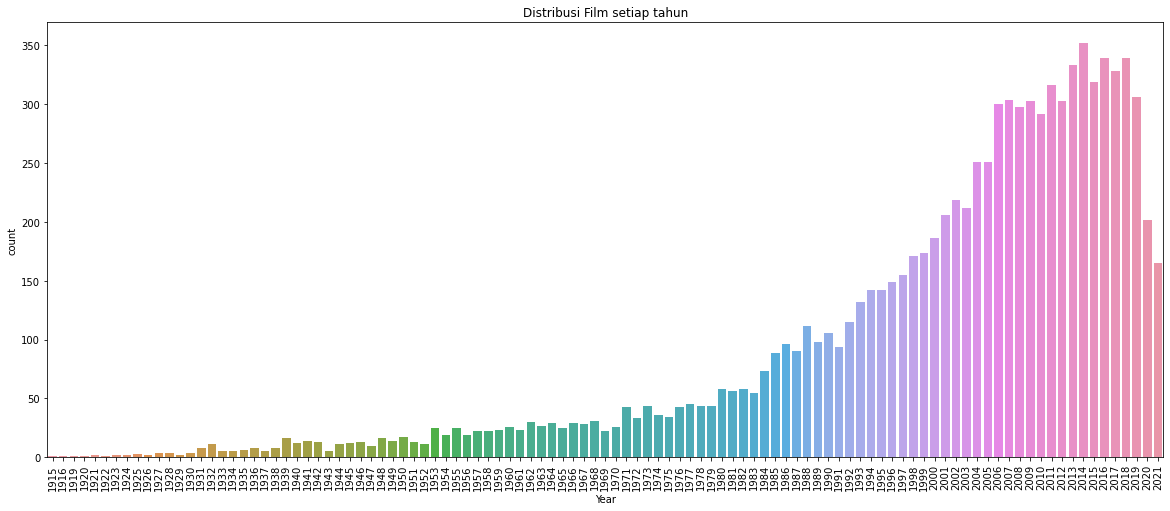

In [ ]:
# melihat distribusi film berdasarkan tahun rilis
fig, ax = plt.subplots(figsize=(20,8))
ax.set_title('Distribusi Film setiap tahun')
sns.countplot(x='Year', data=df, ax=ax)
plt.xticks(rotation=90)

In [ ]:
# judul film dengan vote terbanyak (populer)
popular = df['Vote'].idxmax()
print("Film yang paling poluper yaitu {} yang dirilis pada tahun {}".format(df['Title'][popular], df['Year'][popular]))

# judul film dengan vote paling sedikit
unpopular = df['Vote'].idxmin()
print("Film yang kurang poluper yaitu {} yang dirilis pada tahun {}".format(df['Title'][unpopular], df['Year'][unpopular]))

Film yang paling poluper yaitu The Shawshank Redemption yang dirilis pada tahun 1994
Film yang kurang poluper yaitu Quatermass and the Pit yang dirilis pada tahun 1967


In [ ]:
# judul film dengan durasi terpanjang
longest = df['Runtime'].idxmax()
print("Film dengan durasi terpanjang adalah {} dengan durasi {} menit".format(df['Title'][longest], df['Runtime'][longest]))

# judul film dengan durasi terpendek
sortest = df['Runtime'].idxmin()
print("Film dengan durasi terpendek adalah {} dengan durasi {} menit".format(df['Title'][sortest], df['Runtime'][sortest]))

Film dengan durasi terpanjang adalah Satantango dengan durasi 439 menit
Film dengan durasi terpendek adalah Sherlock Jr. dengan durasi 45 menit


In [30]:
# 10 director dengan film terbanyak
director_film = df['Director'].value_counts()
director_film.head(10)

Woody Allen          47
Clint Eastwood       37
Alfred Hitchcock     35
Steven Spielberg     31
Ridley Scott         26
Ron Howard           25
Steven Soderbergh    24
Martin Scorsese      23
Joel Schumacher      20
Brian De Palma       20
Name: Director, dtype: int64